In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
fire_df = pd.read_csv("../Resources/fire_data/fire_all_clean.csv", index_col="City_ID")
fire_df.head()

# fire_duplicates = fire_df.duplicated()
# print(fire_df[fire_duplicates])
#NO DUPLICATES

filtered_fire = fire_df[["Year", "Month", "County", "Acres burned", "Duration (days)"]]

# filtered_fire=filtered_fire.groupby(['Year','Month', 'County'])
filtered_fire.head()

filtered_fire = 

,Year,Month,County,Acres burned,Duration (days)
City_ID,,,,,
0,2017,October,Shasta,37.0,70 days
1,2009,May,San Diego,122.0,1 days
2,2013,February,Inyo,407.0,4 days
3,2013,April,San Bernardino,30.0,2 days
4,2013,April,Madera,274.0,1 days


In [65]:
filtered_fire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1943 entries, 0 to 2196
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             1943 non-null   int64  
 1   Month            1943 non-null   object 
 2   County           1943 non-null   object 
 3   Acres burned     1943 non-null   float64
 4   Duration (days)  1943 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 91.1+ KB


In [66]:
rainfall_df = pd.read_csv("../Resources/weather_data/rainfall_all_years_clean.csv", index_col="City_ID")
filtered_rain = rainfall_df[["County", "Year", "Month", "Rainfall (inches)"]]
filtered_rain.head()

# rain_duplicates = filtered_rain.duplicated()
# print(filtered_rain[rain_duplicates])
# NO DUPLICATES

,County,Year,Month,Rainfall (inches)
City_ID,,,,
0,Alameda,2013,March,0.63
1,Alpine,2013,March,2.56
2,Amador,2013,March,2.89
3,Butte,2013,March,2.57
4,Calaveras,2013,March,2.75


In [67]:
filtered_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7830 entries, 0 to 7829
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   County             7830 non-null   object 
 1   Year               7830 non-null   int64  
 2   Month              7830 non-null   object 
 3   Rainfall (inches)  7830 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 305.9+ KB


In [82]:
temperature_df = pd.read_csv("../Resources/weather_data/temperature_all_years_clean.csv", index_col="City_ID")
filtered_temp=temperature_df[["County", "Year", "Month", "Temperature (F)"]]

In [71]:
filtered_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7772 entries, 0 to 7771
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   County           7772 non-null   object 
 1   Year             7772 non-null   int64  
 2   Month            7772 non-null   object 
 3   Temperature (F)  7772 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 303.6+ KB


In [85]:
temp_duplicates = filtered_temp[["County","Month", "Year"]].duplicated()
# print(filtered_temp[temp_duplicates])
## 522 duplicates

clean_temp = filtered_temp[["County","Month", "Year"]].drop_duplicates()
clean_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7250 entries, 0 to 7771
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   County  7250 non-null   object
 1   Month   7250 non-null   object
 2   Year    7250 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 226.6+ KB


In [74]:
fire_rain = pd.merge(filtered_fire, filtered_rain, on=["Month", "Year", "County"], how="left")
fire_rain.tail()

,Year,Month,County,Acres burned,Duration (days),Rainfall (inches)
1938,2023,December,Ventura,2715.0,3 days,5.37
1939,2023,December,Kern,181.0,0 days,1.12
1940,2023,December,San Diego,50.0,1 days,0.93
1941,2024,February,Riverside,239.0,6 days,2.70
1942,2024,February,Monterey,11.0,0 days,7.66


In [75]:
fire_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1943 entries, 0 to 1942
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1943 non-null   int64  
 1   Month              1943 non-null   object 
 2   County             1943 non-null   object 
 3   Acres burned       1943 non-null   float64
 4   Duration (days)    1943 non-null   object 
 5   Rainfall (inches)  1897 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 91.2+ KB


In [87]:
fire_rain_temp = pd.merge(fire_rain, clean_temp, on=["Month", "Year", "County"], how="left")
fire_rain_temp.tail()

,Year,Month,County,Acres burned,Duration (days),Rainfall (inches)
1938,2023,December,Ventura,2715.0,3 days,5.37
1939,2023,December,Kern,181.0,0 days,1.12
1940,2023,December,San Diego,50.0,1 days,0.93
1941,2024,February,Riverside,239.0,6 days,2.70
1942,2024,February,Monterey,11.0,0 days,7.66


In [89]:
fire_rain_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1943 entries, 0 to 1942
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1943 non-null   int64  
 1   Month              1943 non-null   object 
 2   County             1943 non-null   object 
 3   Acres burned       1943 non-null   float64
 4   Duration (days)    1943 non-null   object 
 5   Rainfall (inches)  1897 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 91.2+ KB


In [91]:
fire_rain_temp = fire_rain_temp.dropna()
fire_rain_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1897 entries, 0 to 1942
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1897 non-null   int64  
 1   Month              1897 non-null   object 
 2   County             1897 non-null   object 
 3   Acres burned       1897 non-null   float64
 4   Duration (days)    1897 non-null   object 
 5   Rainfall (inches)  1897 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 103.7+ KB


In [93]:
fire_rain_temp.head()

,Year,Month,County,Acres burned,Duration (days),Rainfall (inches)
0,2017,October,Shasta,37.0,70 days,0.81
2,2013,February,Inyo,407.0,4 days,0.03
3,2013,April,San Bernardino,30.0,2 days,0.02
4,2013,April,Madera,274.0,1 days,0.87
5,2013,May,Tehama,6896.0,8 days,0.85


In [30]:
#create summary data
summary_df = fire_rain_temp.agg(
    #count incidents
    Total Incidents=("County","count"), 
    
    #total acre burned
    Total Acres Burned=("Acres burned", "sum"),
    
    #avg acres burned and round to whole number
    avg_acres_burned=("Acres burned", "mean"),
    
    #total rain
    total_rain =("Rainfall (inches)", "sum")
)

# convert 'total_acres_burned' and 'avg_acres_burned' to whole numbers/integer
county_summary['total_acres_burned'] = county_summary['total_acres_burned'].astype(int)
county_summary['avg_acres_burned'] = county_summary['avg_acres_burned'].round(0).astype(int)

#sort by descending incident count
#county_summary = county_summary.sort_values(by=["incident_count"], ascending=False)

county_summary.head()
county_series = filter_county["Name"].sort_values(ascending=False)

county_stat_all = county_series.agg(['mean', 'median', 'var', 'std', 'sem', 'max'])
county_stat_all

# top_county_list = county_series[county_series>60].index.tolist()
# print(top_county_list)

mean        33.122807
median      24.000000
var       1029.359649
std         32.083635
sem          4.249581
max        192.000000
Name: Name, dtype: float64

In [31]:
county_summary.head()

incident_count  total_acres_burned  avg_acres_burned  \
County  Year Month                                                          
Alameda 2013 July                 2                  88                44   
             June                 1                 240               240   
        2015 August               1                2850              2850   
        2016 June                 1                 211               211   
        2017 August               2                 244               122   

                     total_rain  
County  Year Month               
Alameda 2013 July          0.00  
             June          0.12  
        2015 August        0.02  
        2016 June          0.00  
        2017 August        0.02

In [32]:
top_county_list = county_series.head(5).index.tolist()
print(top_county_list)

['Riverside', 'San Diego', 'Kern', 'San Luis Obispo', 'Butte']


In [55]:
#create a new df for the top ten counties. Summarize data to include total rain and total acres burned

top_counties = filtered_county_summary = county_summary[county_summary.index.get_level_values('County').isin(top_county_list)]
top_counties

incident_count  total_acres_burned  \
County          Year Month                                           
Butte           2013 August                  3                2436   
                     June                    1                 298   
                     October                 1                 305   
                2014 July                    1                  72   
                2015 July                    1                 400   
...                                        ...                 ...   
San Luis Obispo 2022 May                     1                  48   
                     September               1                  16   
                2023 August                  1                 693   
                     July                    1                 100   
                     October                 2                 367   

                                avg_acres_burned  total_rain  
County          Year Month                                    
Butte           2013 August                  812        0.09  
                     June                    298        1.42  
                     October                 305        0.45  
                2014 July                     72        0.03  
                2015 July                    400        0.06  
...                                          ...         ...  
San Luis Obispo 2022 May                      48        0.00  
                     September                16        0.70  
                2023 August                  693        0.07  
                     July                    100        0.00  
                     October                 184        0.04  

[211 rows x 4 columns]

In [45]:
# years = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
#        '2021', '2022', '2023']
# fire_vs_rainfall_df['Year'] = fire_vs_rainfall_df['Year'].astype(str)

# year_dfs = {}

# for x in years:
#     if x in fire_vs_rainfall_df['Year'].values:
#         # Filter data for the year
#         year_dfs[f'df_{x}'] = fire_vs_rainfall_df.loc[fire_vs_rainfall_df["Year"] == x]

#         # Aggregate data
#         monthly_data = year_dfs[f'df_{x}'].groupby('Month').agg({
#             'Rainfall (inches)': 'sum',  # Example aggregation
#             'Acres burned': lambda x: (x.sum()/1000)        # Example aggregation
#         })
        
# year_dfs[df_2017].head()

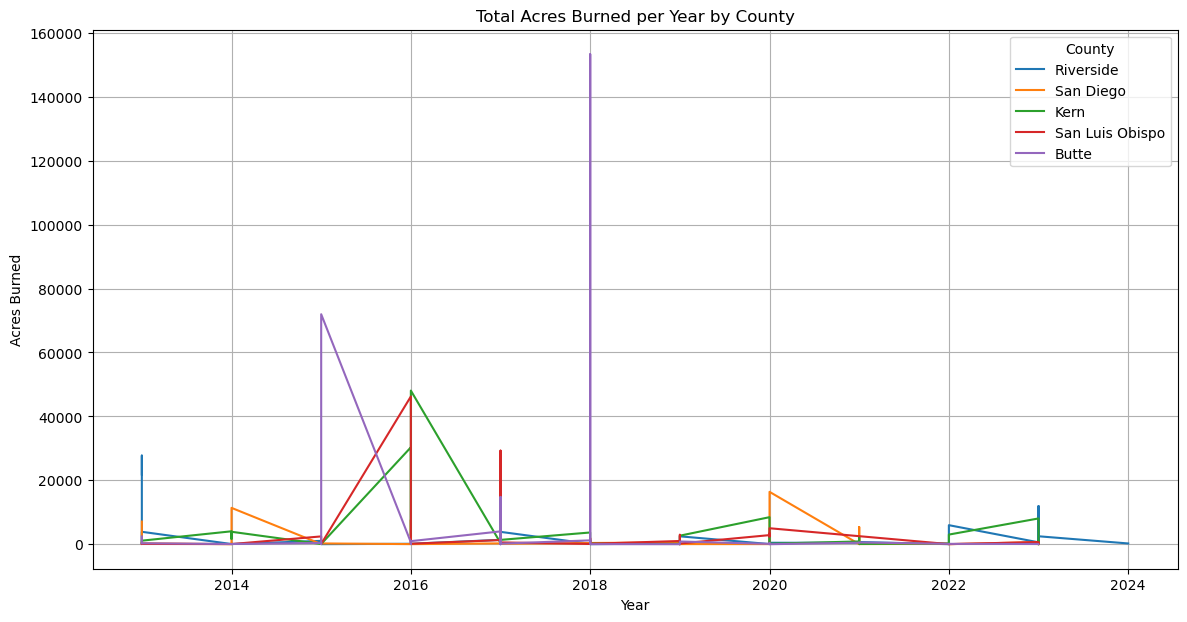

2023


In [75]:
import matplotlib.pyplot as plt

top_counties_df = top_counties.reset_index()
# top_counties_df.head()
#Plotting total acres burned over the years for the top counties
plt.figure(figsize=(14, 7))
for county in top_county_list:
    x_values = top_counties_df.loc[top_counties_df['County'] == county, 'Year'].tolist()
    y_values = top_counties_df.loc[top_counties_df['County'] == county, 'total_acres_burned'].tolist()
    plt.plot(x_values, y_values, label=county)

plt.title('Total Acres Burned per Year by County')
plt.xlabel('Year')
plt.ylabel('Acres Burned')
plt.legend(title='County')
plt.grid(True)
plt.show()
print(x)


In [ ]:
county_summary.head()

In [ ]:
county_dfs = {}  

for x in top_county_list:
    if x in fire_vs_rainfall_df['County'].values:
         # Filter data for the county
        county_dfs[f'df_{x}'] = year_dfs[df_2017].loc[year_dfs[df_2017]["County"] == x]

        # Aggregate data
        county_data = county_dfs[f'df_{x}'].groupby('Month').agg({
            'Rainfall (inches)': 'sum',  # Example aggregation
            'Acres burned': lambda x: (x.sum()/1000)        # Example aggregation
        })

In [ ]:
#relevant columns
monthly_data = fire_vs_rainfall_df[['Month','Year', 'Rainfall (inches)', 'Acres burned']]

grouped_by_year_month = monthly_data.groupby(['Year', 'Month'])
incidents_per_month_year = grouped_by_year_month.size()
incidents_per_month_year

plt.figure(figsize=(12, 8))
incidents_per_month_year.unstack().plot(kind='bar')
plt.title('Count of Incidents in Each Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()

In [ ]:
#list(fire_vs_rainfall_df.columns)

In [ ]:
clean_fire_rainfall = fire_vs_rainfall_df[[
 #'County',
 'Rainfall (inches)',
 'Month',
 'Year',
 'Acres burned',
 #'Duration (days)',
 #'Year extinguished',
 #'Month created (num)'
                                          ]]
#'Lon',
#'Lat',

#clean_fire_rainfall.head()

In [ ]:
#Creating a new df for fire vs rainfall grouped by month
month_fire_rainfall = clean_fire_rainfall.groupby(["Month"])
month_fire_rainfall.head()

month_df = month_fire_rainfall.agg(
    #Sum rainfall
    sum_rainfall = ("Rainfall (inches)", "sum"),
    avg_rainfall = ("Rainfall (inches)", "mean"),

    sum_acres_burned = ("Acres burned", "sum"),
    avg_acres_burned = ("Acres burned", "mean")

)

month_df.reset_index(inplace=True)

#set months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#organize months
month_df['Month'] = pd.Categorical(month_df['Month'], categories=months, ordered=True)
month_df.sort_values(by='Month',inplace=True)  # same as you have now; can use inplace=True

month_df[['sum_acres_burned','avg_acres_burned']].astype(int)
month_df[['sum_rainfall', 'avg_rainfall']].round(2)
month_df

In [ ]:
#Creating a new df for fire vs rainfall grouped by month
year_fire_rainfall = clean_fire_rainfall.groupby(["Year"])
year_fire_rainfall.head()

year_df = year_fire_rainfall.agg(
    #Sum rainfall
    sum_rainfall = ("Rainfall (inches)", "sum"),
    avg_rainfall = ("Rainfall (inches)", "mean"),

    sum_acres_burned = ("Acres burned", "sum"),
    avg_acres_burned = ("Acres burned", "mean")

)

year_df = year_df.round(0) 

year_df["avg_acres_burned(scaled_per_100)"] = year_df["avg_acres_burned"]/ 100
year_df

In [ ]:
import matplotlib.pyplot as plt

# Data
years = month_df.index
sum_rainfall = month_df['sum_rainfall']
#sum_acres_burned = month_df['sum_acres_burned']
avg_acres_burned_scaled = month_df['avg_acres_burned'] / 100  # Scale the values by dividing by 100

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Width of each bar
bar_width = 0.25

# Positions for the bars
index = range(len(years))

# Plotting the bars
plt.bar(index, sum_rainfall, color='blue', width=bar_width, label='Sum Rainfall')
#plt.bar([i + bar_width for i in index], sum_acres_burned, color='orange', width=bar_width, label='Sum Acres Burned')
plt.bar([i + 2*bar_width for i in index], avg_acres_burned_scaled, color='green', width=bar_width, label='Avg Acres Burned (Scaled)')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Relationship between Rainfall and Acres Burned')
plt.xticks([i + bar_width for i in index], years)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Data
rainfall = month_df['sum_rainfall']
acres_burned = month_df['sum_acres_burned']

# Fit a trendline (linear regression)
#slope, intercept = np.polyfit(rainfall, acres_burned, 1)
result = stats.linregress(rainfall, acres_burned)
slope, intercept, r = result.slope, result.intercept, result.rvalue

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(rainfall, acres_burned, color='blue', label='Data Points')
plt.plot(rainfall, slope * rainfall + intercept, color='red', label='Trendline')

# Labels and title
plt.xlabel('Sum Rainfall')
plt.ylabel('Sum Acres Burned')
plt.title('Sum Rainfall vs Sum Acres Burned')
plt.legend()

plt.annotate(f'r={r}', (50, 1e6), color="r")

# Show plot
plt.grid(True)
plt.show()


# p value
# rsquared
#scikitlearn
# stat